# Developing Our Model

Our goal: 

Develop several models that will predict the price of a car using it's variables or features.

Use cases:
- Do i know if a dealer is offering a fair value for my trade-in?
- Do i know if i put a fair value on my car?


### Setting up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

### Simple Linear Regression
- Method to help us understand the relationship between two variables
    - X : Predictor/Independent Variable 
    - Y : Target/Response/Dependent Variable
- Result of linear regression is a __linear function__ that predicts the target variable as a function of the predictor variable.
    - __Yhat = a +bX__
    - __a__: y-intercept of regression line
    - __b__: slope of the regression line

Let's load our modules for linear regression:

In [3]:
from sklearn.linear_model import LinearRegression

Creating our linear regression object:

In [4]:
lm = LinearRegression()
lm

LinearRegression()

#### How could 'highway-mpg' help us predict car prices?

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
# to fit is to train
lm.fit(X,Y)

LinearRegression()

In [7]:
print('Coefficient: ',lm.coef_,'\nY-Intercept:',lm.intercept_)


Coefficient:  [-821.73337832] 
Y-Intercept: 38423.305858157415


Our model:

__price = 38423.31 - 821.73 x highway-mpg__



#### How could 'engine-size' help us predict car prices?

In [8]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y) 

LinearRegression()

In [9]:
print('Coefficient: ',lm1.coef_,'\nY-Intercept:', lm1.intercept_)

Coefficient:  [166.86001569] 
Y-Intercept: -7963.338906281046


Our model:

__price = -7963.34 + 166.86 x engine-size__


### Multiple Linear Regression
- Method to help us understand the relationship between one continous target variable and multiple predictor variables.
- Most real-world regression models involve multiple predictors

Previously, we determined some good predictors of price could be:
- horsepower
- curb-weight
- engine-size
- highway-mpg
    
Let's develop a model using these variables as predictors.

In [10]:
Z = df [['horsepower','curb-weight', 'engine-size','highway-mpg']]
Y = df['price']
mlr = LinearRegression()
mlr.fit(Z, Y)

LinearRegression()

In [11]:
print('Coefficient: ',mlr.coef_,'\nY-Intercept:', mlr.intercept_)

Coefficient:  [53.49574423  4.70770099 81.53026382 36.05748882] 
Y-Intercept: -15806.624626329227


Our multiple linear regression model:

__price = -15806.62 + 53.50(horsepower) + 4.71(curb-weight) + 81.53(engine-size) + 36.06(highway-mpg)__

Now, let's try with just 'normalized-losses' and 'highway-mpg' as predictors.

In [12]:
mlr2 = LinearRegression()
mlr2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

In [13]:
print('Coefficient: ',mlr2.coef_,'\nY-Intercept:', mlr2.intercept_)

Coefficient:  [   1.49789586 -820.45434016] 
Y-Intercept: 38201.31327245733


Our model:

__price = 38201.31 + 1.50(normalized-losses) - 820.45(highway-mpg)__

## 2. Model Evaluation Using Visualization

### Regression Plot
When it comes to linear regression, regression plots are an excellent way to visualize the fit of our model.

In [14]:
import seaborn as sb
%matplotlib inline

#### Let's visualize __highway-mpg__ as a potential predictor for price:

(0.0, 48171.1479666867)

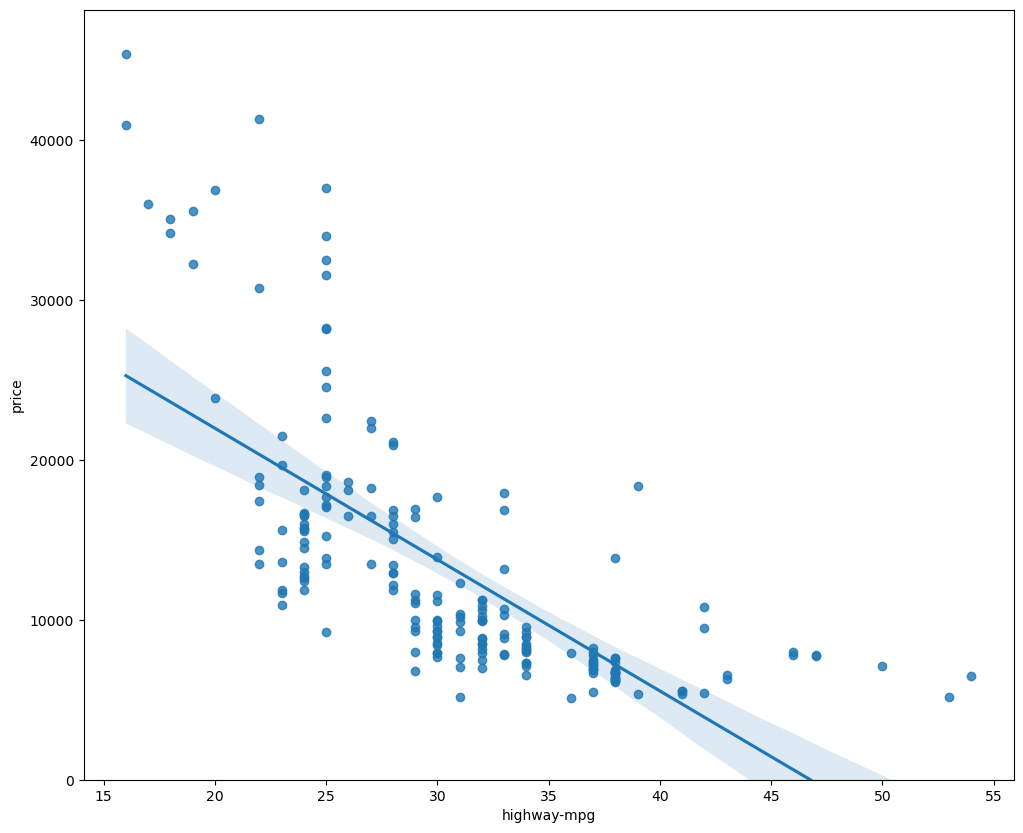

In [15]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sb.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)

#### Now let's see __peak-rpm__ as a potential predictor for price:

(0.0, 47414.1)

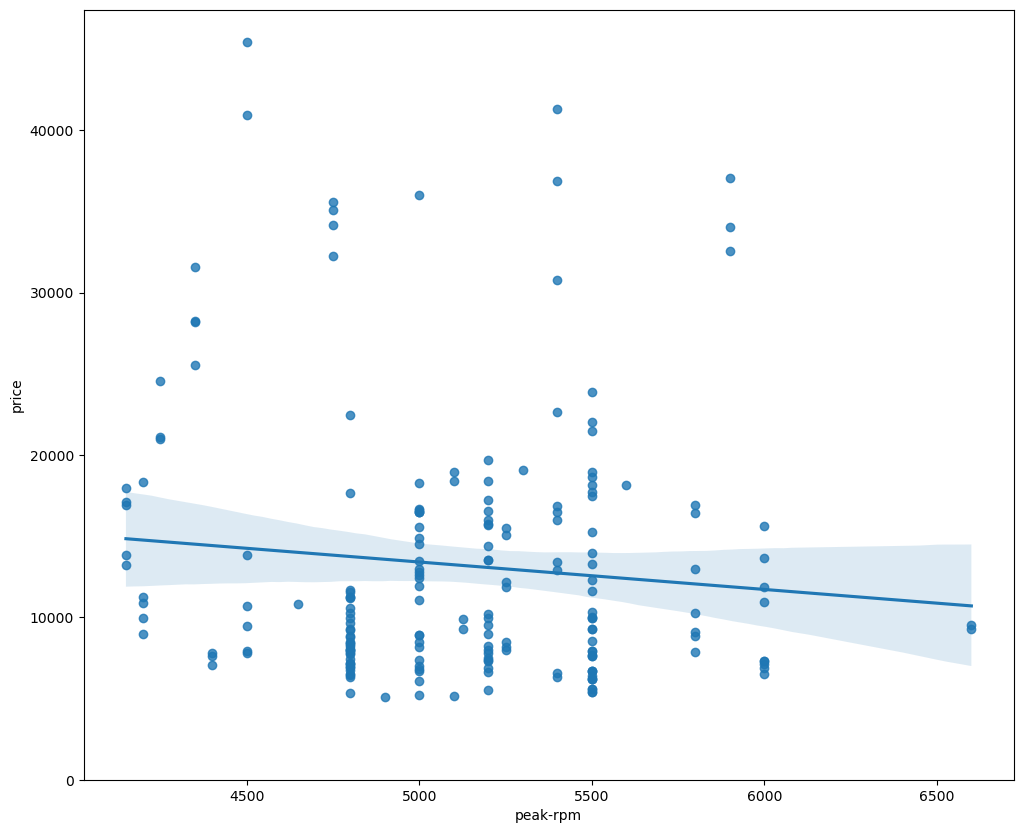

In [16]:
plt.figure(figsize=(width, height))
sb.regplot(x='peak-rpm',y='price', data=df)
plt.ylim(0,)

#### Given our plots, it seems that __highway-mpg__ is more strongly correlated to price than __peak-rpm__

In [17]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Our observations are confirmed above with __highway-mpg__ having a number closer to -1, while __peak-rpm__ is not close to -1 or 1.

### Residual Plot
A residual is the difference between the observed value and the predicted value, in a plot it is the distance from a data point to the fitted regression line.

A residiual plot shows the residuals on the y-axis and the independent variable on the x-axis.

In order to evaluate our model, we examine the spread of the residuals.
- If the residuals are randomnly spread out around the x-axis, the linear model is appropriate for the data
- Otherwise, our model may not be approriate for the data.

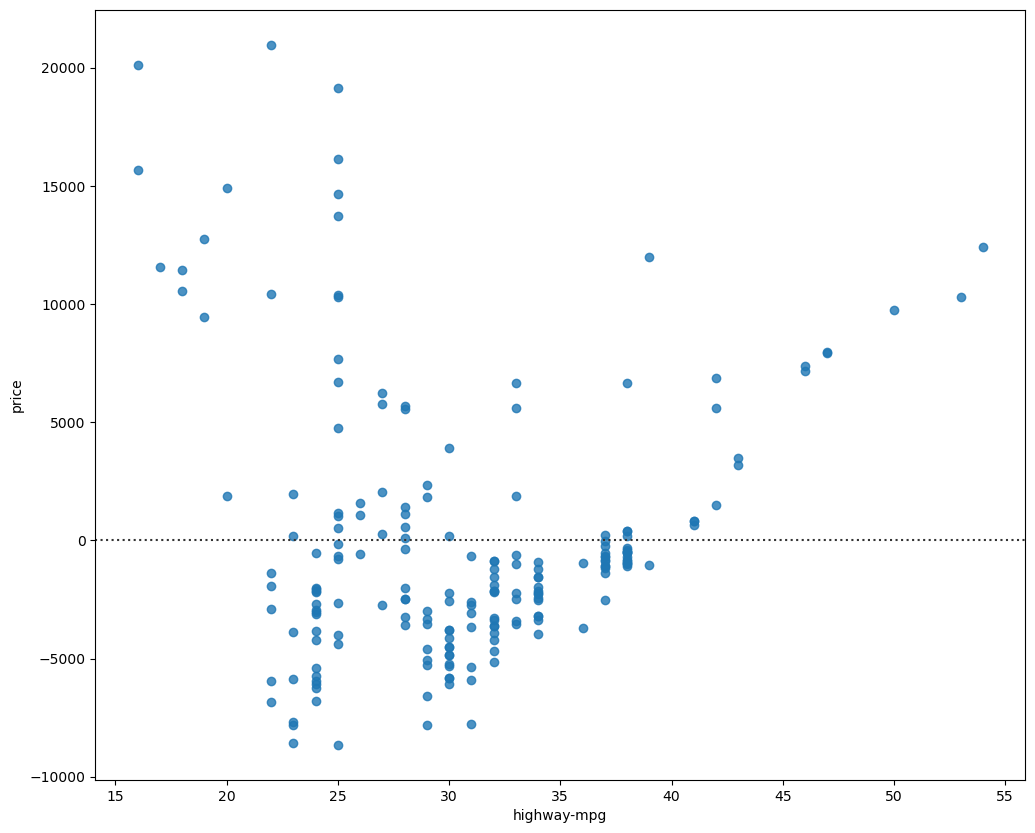

In [18]:
plt.figure(figsize=(width,height))
sb.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In our plot, we can see variance is not constant.
- There appears to be a curve up after the 30 mark on the x-axis
- There also appears to be a big clustering below 5000 dollars in price and from 20 to 35 highway-mpg

Ultimately, the residuals are not randomnly spead around the x-axis.</br>
Our linear model may not be appropriate for our data.

### Visualizing Multiple Linear Regression

For Multiple Linear Regression models, we can't use regression plots or residual plots.

However, one way to visualize them is using a distribution plot. Here we would compare the distribution of the fitted values that the model predicts and compare it to the distribution of the actual values.

In [19]:
# first let's make some predictions
Y_hat = mlr.predict(Z)

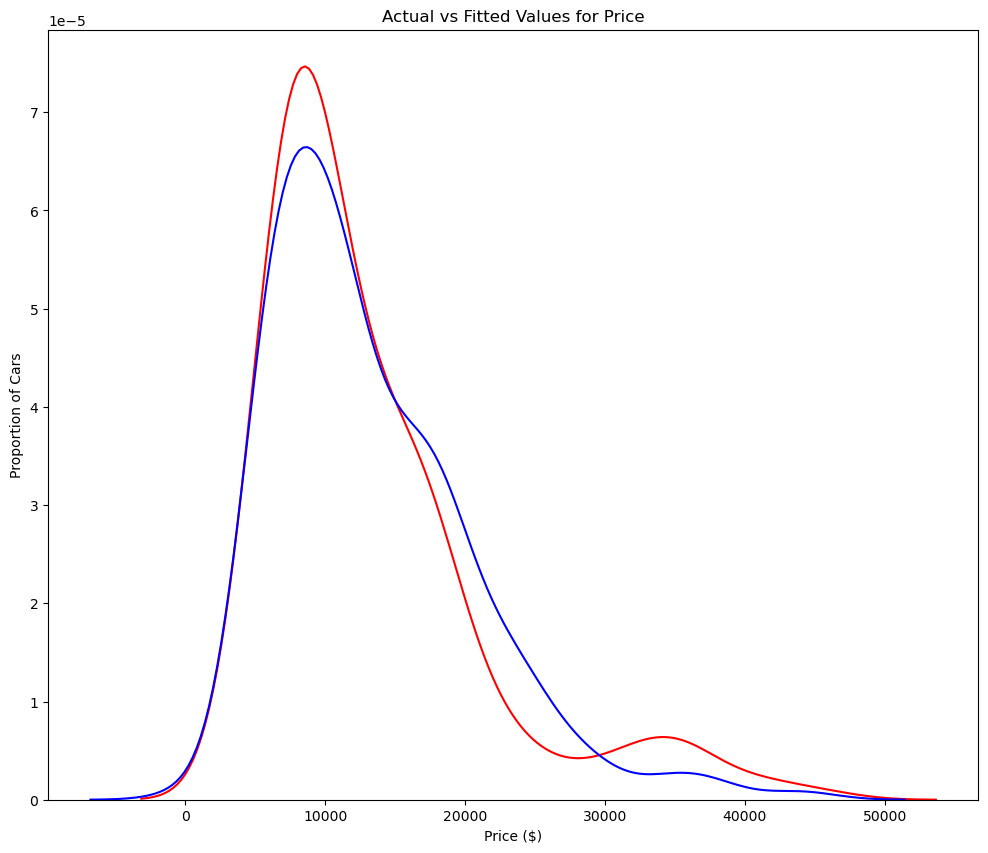

In [20]:
plt.figure(figsize=(width,height))

ax1 = sb.distplot(df['price'], hist=False, color='r',
                  label='Actual Value')
sb.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price ($)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

From our distribution plot, we can see that the predicted values are relatively close to the actual values since there is some overlap. However, there is some room for improvement around the 20,000 to 40,000 range.   

## 3. Polynomial Regression and Pipelines

Polynomial regression gives us __non-linear__ relationships by squaring or setting higher-order terms of the predictor variables.

When we visualized a __linear__ model using "highway-mpg"as a predictor for price, we saw it did not provide a good fit for our data.

Let's try using a polynomial model instead.

In [21]:
def PlotPolly(model, i_var, d_var, Name):
    # creates 100 equally spaced intervals between 15 and 55
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(i_var, d_var, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [22]:
x = df['highway-mpg']
y = df['price']
# using 3rd order polynomial (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


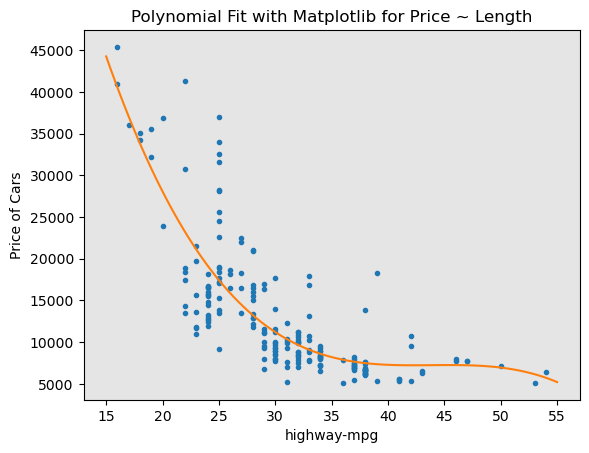

In [23]:
PlotPolly(p, x, y, 'highway-mpg')

We can see that the generated polynomial function is more in line with the data points, it performs better than our linear model.

Let's try a higher order model.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


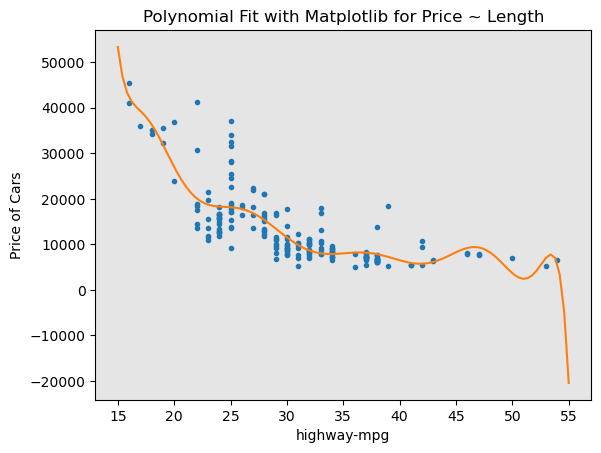

In [24]:
# 11th order polynomial
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

### Multivariate Polynomials

We can perform a polynomial transform on multiple features.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# create PolynomialFeatures object of the 2nd degree
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [27]:
Z_pr = pr.fit_transform(Z)
Z.shape

(201, 4)

In [28]:
Z_pr.shape

(201, 15)

In the original data, we have 201 samples and 4 features.

After our transformation, we have 201 samples and 15 features.

### Pipelines

Pipelines simplify the steps of processing data.

We will use modules Pipeline and StandardScalers.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Pipeline takes in list of tuples including the name of mode and it's constructor.

In [30]:
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

In [31]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize data, perform a transform and produce a prediction simultaneusly.

In [33]:
ypipe = pipe.predict(Z)
ypipe[0:3]

array([13102.74784201, 13102.74784201, 18225.54572197])

##### Let's make a new pipeline that will standardize data and produce a prediction using a linear model with features Z and target Y.

In [34]:
Input =[('scale', StandardScaler()),
       ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

## 4. Measures for In-Sample Evaluation

When evaluating our models, we want to visualize them as well as retrieve quantative measurements to determine how accurate the model is.

The most common methods are:
- R-Squared
    - "Coefficient of determination", measure to indicate how close the data is to the fitted regression
    - Value is the percentage of variation of the response variable (Y) that is explained by a linear model
- Mean Squared Error (MSE)
    - Measures the average of the quares of errors.
    - Errors meaning the difference between the actual value and the estimated value

### Model 1: Simple Linear Regression

In [35]:
# using highway-mpg to predict price
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

#Finding R-Squared
print('R-Squared = ', lm.score(X,Y))

R-Squared =  0.4965911884339175


__~ 49.659%__ of the variation of price is explained by this model.

Now let's look at our MSE.

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
# get predicted values
Y_hat = lm.predict(X)

In [38]:
# comparing predicted values with actual values
mse = mean_squared_error(df['price'],Y_hat)
print('MSE: ', mse)

MSE:  31635042.944639895


### Model 2: Multiple Linear Regression

In [39]:
lm.fit(Z, df['price'])
print('R-Squared: ',lm.score(Z, df['price']))

R-Squared:  0.8093562806577457


__~ 80.936%__ of the variation of price is explained by this model.

Now let's look at our MSE.

In [41]:
# get predicted values
Y_hat_mlr = lm.predict(Z)
# compare predicted values with expected values
mse = mean_squared_error(df['price'], Y_hat_mlr)
print('MSE: ', mse)

MSE:  11980366.87072649


### Model 3: Polynomial Fit

For Polynomial Linear Regression we must use a different function to calculate R-Squared.

In [42]:
from sklearn.metrics import r2_score

In [46]:
# using highway-mpg to predict price
x = df['highway-mpg']
y = df['price']
# using 3rd order polynomial (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
r_sq = r2_score(y, p(x))
print('R-Squared: ',r_sq)

R-Squared:  0.674194666390652


__~ 67.420%__ of the variation of price is explained by this model.

Now let's look at our MSE.

In [48]:
mse = mean_squared_error(df['price'], p(x))
print('MSE: ',mse)

MSE:  20474146.426361218


## 5. Prediction and Decision Making

In [49]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Create new input:

In [56]:
new_input = np.arange(1, 100, 1).reshape(-1,1)

Fit the model:

In [58]:
lm.fit(X,Y)
lm

LinearRegression()

Get predictions:

In [59]:
yhat = lm.predict(new_input)
yhat[0:3]

array([37601.57247984, 36779.83910151, 35958.10572319])

Plot data:

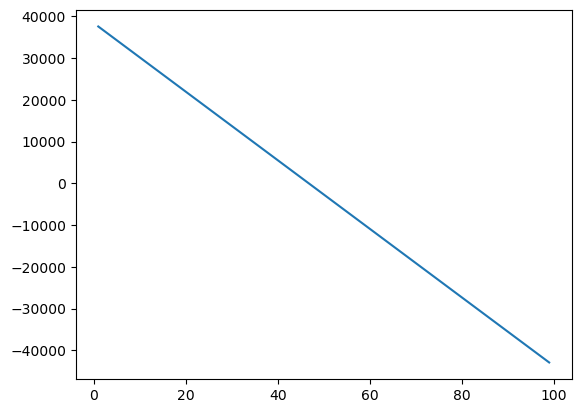

In [61]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

##### When comparing models
- The model with the __higher R-Squared__ value is a better fit for the data.
- The model with the __smallest MSE__ value is a better fit for the data.

##### Our models:
1. Simple Linear Regression: 
    - Using highway-mpg to predict price.
    - R-Squared: .49659118843391759
    - MSE:  3.16 x10^7
2. Multiple Linear Regression:
    - Using horsepower, curb-weight, engine-size, and highway-mpg to predict price.
    - R-Squared: .80896354913783497
    - MSE: 1.2 x10^7
    
3. Polynomial Fit:
    - Using highway-mpg to predic price
    - R-Squared: .6741946663906514
    - MSE: 2.05 x 10^7

#### Decision:
After evalutating our models, I would conclude that our MLR model is the best fitting for our data.
- It has the highest R-Squared value between our models.
- It also has the lowest MSE value between our models.